In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import utils

df = datasets.fetch_openml(data_id=1523, as_frame=True).frame
df['Class'] = LabelEncoder().fit_transform(df['Class'])

target = df["Class"]
data = df.drop(["Class"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

y_train = utils.to_categorical(y_train, num_classes=3)
y_test = utils.to_categorical(y_test, num_classes=3)

In [89]:
from keras import layers, Sequential, Input

model = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        layers.Dense(50, activation='relu'),
        layers.Dense(25, activation='relu'),
        layers.Dense(3, activation='softmax')
    ]
)

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=["accuracy"])


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2291 - loss: 1.0868 - val_accuracy: 0.2400 - val_loss: 1.0962
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2707 - loss: 1.0632 - val_accuracy: 0.2600 - val_loss: 1.0635
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3732 - loss: 1.0202 - val_accuracy: 0.3400 - val_loss: 1.0347
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4023 - loss: 0.9963 - val_accuracy: 0.4000 - val_loss: 1.0104
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4890 - loss: 0.9368 - val_accuracy: 0.4200 - val_loss: 0.9866
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4884 - loss: 0.9222 - val_accuracy: 0.4200 - val_loss: 0.9682
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4775 - loss: 0.9117 - val_accuracy: 0.4800 - val_loss: 0.9504
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4990 - loss: 0.9204 - val_accuracy: 0.5200 - val_loss: 0.9358
Epoch 9

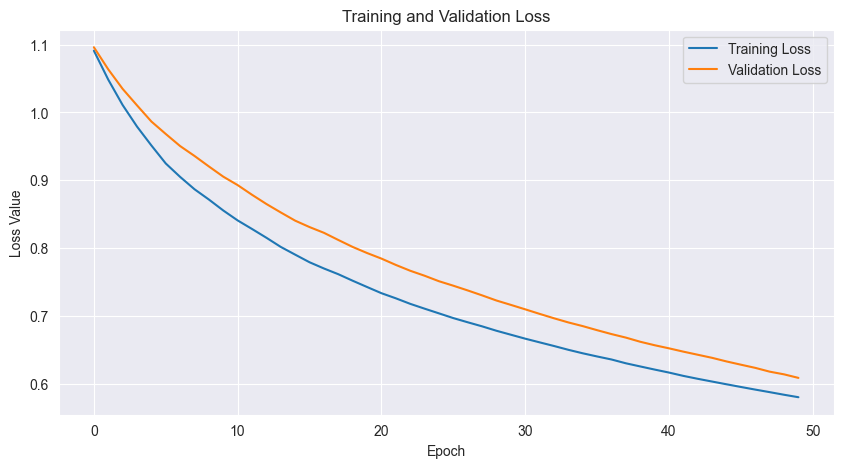

In [90]:
from matplotlib import pyplot as plt

history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

In [46]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Accuracy:", test_accuracy)

y_predict = model.predict(x_test)
print(y_predict[:10])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7661 - loss: 0.5436 
Test Loss: 0.5435847640037537
Accuracy: 0.774193525314331
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.19280523 0.665701   0.14149378]
 [0.2682176  0.49897465 0.23280773]
 [0.254686   0.56928873 0.17602524]
 [0.05544434 0.07049671 0.87405896]
 [0.25248146 0.53025854 0.21726008]
 [0.06789302 0.16703849 0.76506853]
 [0.00512623 0.02006293 0.97481084]
 [0.0200448  0.06554384 0.9144113 ]
 [0.27392954 0.45584425 0.2702263 ]
 [0.28020877 0.5237954  0.19599584]]


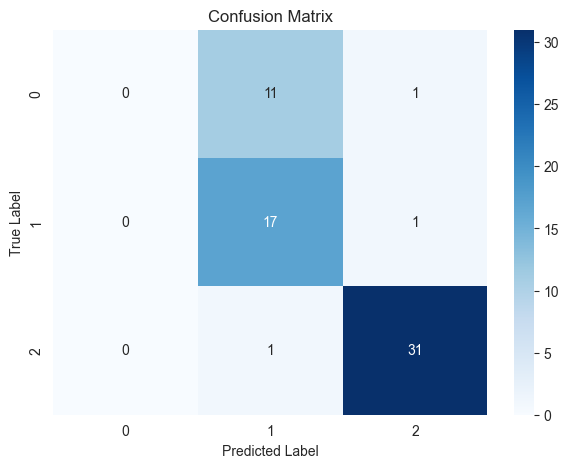

In [47]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_predict, axis=1)

conf_mtx = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.metrics import classification_report

print('\nClassification Report:\n')
print(classification_report(y_test_class, y_pred_class, zero_division=0))


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.59      0.94      0.72        18
           2       0.94      0.97      0.95        32

    accuracy                           0.77        62
   macro avg       0.51      0.64      0.56        62
weighted avg       0.66      0.77      0.70        62

